In [92]:
#You work in XYZ Company as a Python. The company officials want you to write code for a clustering problem.
#1. K-Means Clustering: Load customer data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

    

# Step 1 : Reading and Understanding Data

In [93]:
df = pd.read_csv("customers.csv")
pd.options.display.max_rows = 300
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [94]:
#change column name
df.rename(columns={
        'Annual Income (k$)': 'Annual_income', 
        'Spending Score (1-100)': 'Spending_score'
    }, inplace=True)


df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_income', 'Spending_score'], dtype='object')

In [95]:
# shape of df
df.shape

(200, 5)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_income   200 non-null    int64 
 4   Spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [97]:
df.describe()

,CustomerID,Age,Annual_income,Spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Step 2 : Data Cleansing

In [98]:
#Calculating the Missing Values % contribution in DF
#- Check the number of cells in each column with null values.
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

CustomerID        0.0
Gender            0.0
Age               0.0
Annual_income     0.0
Spending_score    0.0
dtype: float64

In [99]:
x=df.loc[:,"Age"]
y=df.loc[:,["Spending_score"]]


In [100]:
x

0      19
1      21
2      20
3      23
4      31
5      22
6      35
7      23
8      64
9      30
10     67
11     35
12     58
13     24
14     37
15     22
16     35
17     20
18     52
19     35
20     35
21     25
22     46
23     31
24     54
25     29
26     45
27     35
28     40
29     23
30     60
31     21
32     53
33     18
34     49
35     21
36     42
37     30
38     36
39     20
40     65
41     24
42     48
43     31
44     49
45     24
46     50
47     27
48     29
49     31
50     49
51     33
52     31
53     59
54     50
55     47
56     51
57     69
58     27
59     53
60     70
61     19
62     67
63     54
64     63
65     18
66     43
67     68
68     19
69     32
70     70
71     47
72     60
73     60
74     59
75     26
76     45
77     40
78     23
79     49
80     57
81     38
82     67
83     46
84     21
85     48
86     55
87     22
88     34
89     50
90     68
91     18
92     48
93     40
94     32
95     24
96     47
97     27
98     48
99     20


In [101]:
y

,Spending_score
0,39
1,81
2,6
3,77
4,40
5,76
6,6
7,94
8,3
9,72


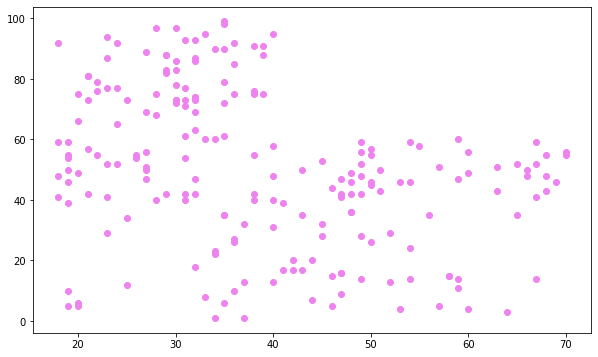

In [159]:
#- Create a scatter plot with Age as X and Spending Score as Y.
plt.figure(figsize=(10,6))
plt.scatter(x, y, color = 'violet')
plt.show()

# Step 3 : Data Preparation

In [103]:
#Drop column Gender
df.drop(columns = ["Gender"], inplace = True)
df

,CustomerID,Age,Annual_income,Spending_score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
5,6,22,17,76
6,7,35,18,6
7,8,23,18,94
8,9,64,19,3
9,10,30,19,72


#### There are 2 types of outliers and we will treat outliers as it can skew our dataset**
- Statistical
- Domain specific

<AxesSubplot:>

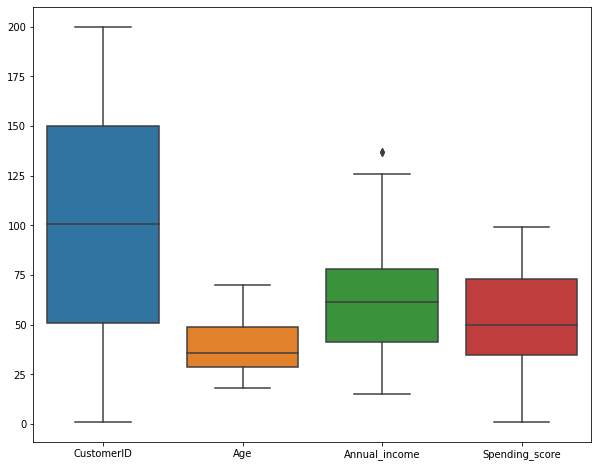

In [105]:
sns.boxplot(data = df)

Text(0.5, 0, 'Attributes')

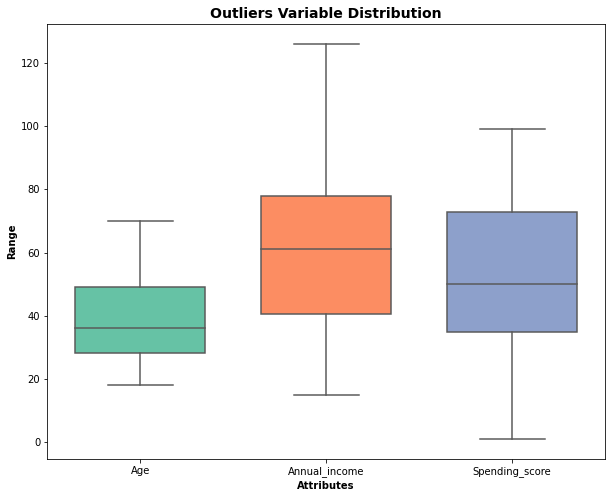

In [123]:
# Outlier Analysis of Age Annual_income and Spending_score

attributes = ['Age','Annual_income','Spending_score']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [121]:
# Removing (statistical) outliers for Annual_income
Q1 = df.Annual_income.quantile(0.25)
Q3 = df.Annual_income.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Annual_income >= Q1 - 1.5*IQR) & (df.Annual_income <= Q3 + 1.5*IQR)]

In [122]:
Q1,Q3, IQR

(41.5, 78.0, 36.5)

### Rescaling the Attributes

It is extremely important to rescale the variables so that they have a comparable scale.|
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Standardisation Scaling.

In [127]:
# Rescaling the attributes

df = df[['Age', 'Annual_income', 'Spending_score']]

# Instantiate
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(198, 3)

In [128]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Age', 'Annual_income', 'Spending_score']
df_scaled.head()

,Age,Annual_income,Spending_score
0,-1.425414,-1.779171,-0.435989
1,-1.282367,-1.779171,1.199413
2,-1.353890,-1.739447,-1.720949
3,-1.139319,-1.739447,1.043661
4,-0.567131,-1.699723,-0.397051


## Step 4 : Building the Model

In [130]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [131]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 3, 3, 1, 3, 1, 3, 2, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3])

#### Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

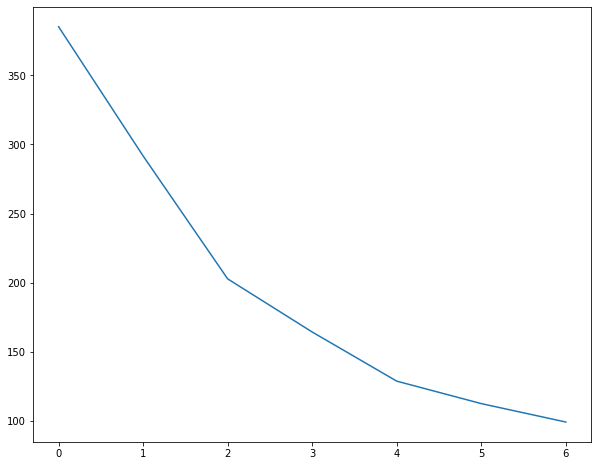

In [132]:
#- Find out the best number for clusters between1 and 10 (inclusive) using the elbow method.
# Elbow-curve/SSD
# inertia
# Sum of squared distances of samples to their closest cluster center.

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [134]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [135]:
 kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [140]:
# assign the label
df['Cluster_Id'] = kmeans.labels_
df.head(10)

,Age,Annual_income,Spending_score,Cluster_Id
0,19,15,39,2
1,21,15,81,2
2,20,16,6,2
3,23,16,77,2
4,31,17,40,2
5,22,17,76,2
6,35,18,6,2
7,23,18,94,2
8,64,19,3,0
9,30,19,72,2


#### Get Centroid

In [145]:
centroid = kmeans.cluster_centers_
centroid

array([[ 0.88298903,  0.08001761, -0.62255028],
       [-0.4277519 ,  0.99338768,  1.21838324],
       [-0.93631879, -0.67681944,  0.13434013]])

In [142]:
kmeans.inertia_

291.69087305086197

Text(0, 0.5, 'Annual_income')

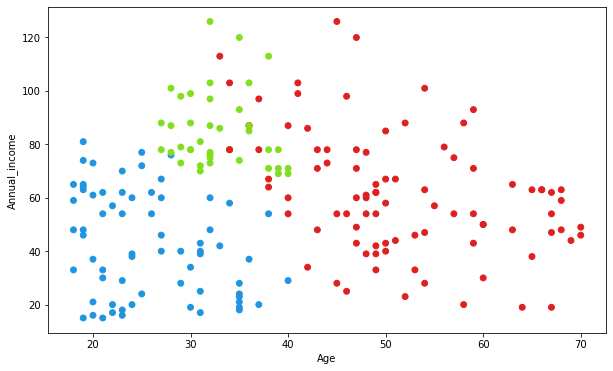

In [158]:
#- Draw a scatter plot displaying data points colored on the basis of clusters.

# define and map colors
fig = plt.figure(figsize=(10,6))
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.Cluster_Id.map({0:colors[0], 1:colors[1], 2:colors[2]})
plt.scatter(df.Age, df.Annual_income,  c=df.c, s=35)
plt.xlabel("Age")
plt.ylabel("Annual_income")